In [1]:
import glob
import itertools
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

sns.set(font_scale = 1.8, style = 'darkgrid', palette='gray')
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
COLUMNS = {
    'network_type': str,
    '$h_G$': int,
    '$h_R$': int,
    'b': float,
    'μ': float,
    'δ': float,
    'interaction_rule': str,
    'update_rule': str,
    'trial': int,
    'cooperator_rate': float
}

GROUPBY_COLUMNS = [c for c in COLUMNS if c not in ['trial', 'cooperator_rate']]

def load_df(csv_file_name: str) -> pd.DataFrame:
    return pd.read_csv(csv_file_name, header=None, names=COLUMNS.keys(), dtype=COLUMNS)

def show_plot(df:pd.DataFrame, ax, title, x_axis):
    ax.set_title(title)
    sns.lineplot(x=x_axis, y='cooperator_rate', ax=ax, data=df)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylabel('Frequency of cooperators')
    ax.set_ylim(-0.03, 1.03)

In [3]:
dir_names = ['clean_data']
file_list = list(itertools.chain.from_iterable([glob.glob('../data/{}/*.csv'.format(dir_name)) for dir_name in dir_names]))
df_list = [load_df(file) for file in file_list]
df_raw = pd.concat(df_list).reset_index(drop=True)

# Result 1
df_ScaleFree_Group_DB = df_raw[
    (df_raw.network_type == 'scale_free_4') &
    (df_raw.interaction_rule == 'Group') &
    (df_raw.update_rule == 'DB') &
    (df_raw['$h_G$'] == 1) &
    (df_raw['$h_R$'] <= 6) &
    (df_raw.b == 5.0) &
    (df_raw.δ == 1.0) &
    (df_raw.μ == 0.0)
]

df_Random_Group_DB = df_raw[
    (df_raw.network_type == 'random_4') &
    (df_raw.interaction_rule == 'Group') &
    (df_raw.update_rule == 'DB') &
    (df_raw['$h_G$'] == 1) &
    (df_raw['$h_R$'] <= 10) &
    (df_raw.b == 5.0) &
    (df_raw.δ == 1.0) &
    (df_raw.μ == 0.0)
]

df_Random_Group_IM = df_raw[
    (df_raw.network_type == 'random_4') &
    (df_raw.interaction_rule == 'Group') &
    (df_raw.update_rule == 'IM') &
    (df_raw['$h_G$'] == 1) &
    (df_raw['$h_R$'] <= 10) &
    (df_raw.b == 5.0) &
    (df_raw.δ == 1.0) &
    (df_raw.μ == 0.0)
]

# Result 2
df_ScaleFree_PairWise_DB = df_raw[
    (df_raw.network_type == 'scale_free_4') &
    (df_raw.interaction_rule == 'PairWise') &
    (df_raw.update_rule == 'DB') &
    (df_raw['$h_R$'] == 1) &
    (df_raw.b == 1.1) &
    (df_raw.δ == 0.01) &
    (df_raw.μ == 0.0)
]

df_Random_PairWise_IM = df_raw[
    (df_raw.network_type == 'random_4') &
    (df_raw.interaction_rule == 'PairWise') &
    (df_raw.update_rule == 'IM') &
    (df_raw['$h_R$'] == 1) &
    (df_raw.b == 1.1) &
    (df_raw.δ == 0.01) &
    (df_raw.μ == 0.0)
]

df_Regular_PairWise_IM = df_raw[
    (df_raw.network_type == 'regular_4') &
    (df_raw.interaction_rule == 'PairWise') &
    (df_raw.update_rule == 'IM') &
    (df_raw['$h_R$'] == 1) &
    (df_raw.b == 1.1) &
    (df_raw.δ == 0.01) &
    (df_raw.μ == 0.0)
]

# Result 1

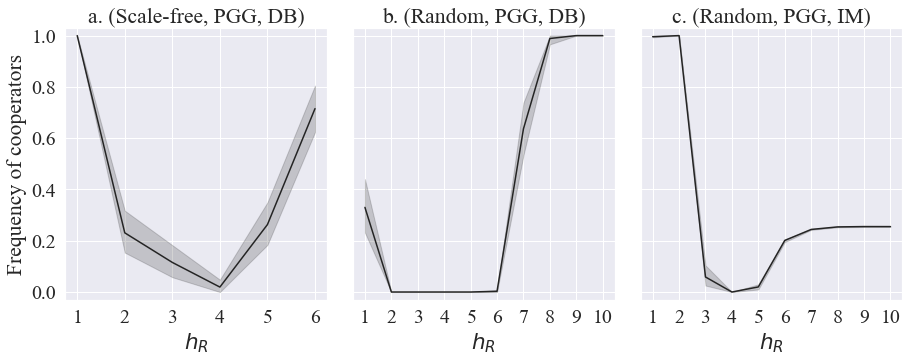

In [4]:
fig, axes = plt.subplots(ncols = 3, nrows = 1, sharey=True, figsize = (15, 5))
plt.subplots_adjust(wspace=0.1)

show_plot(df_ScaleFree_Group_DB, axes[0], 'a. (Scale-free, PGG, DB)', '$h_R$')
show_plot(df_Random_Group_DB,    axes[1], 'b. (Random, PGG, DB)',     '$h_R$')
show_plot(df_Random_Group_IM,    axes[2], 'c. (Random, PGG, IM)',     '$h_R$')

plt.savefig('img/result1.jpg', format='jpeg', bbox_inches='tight')

# Result 2

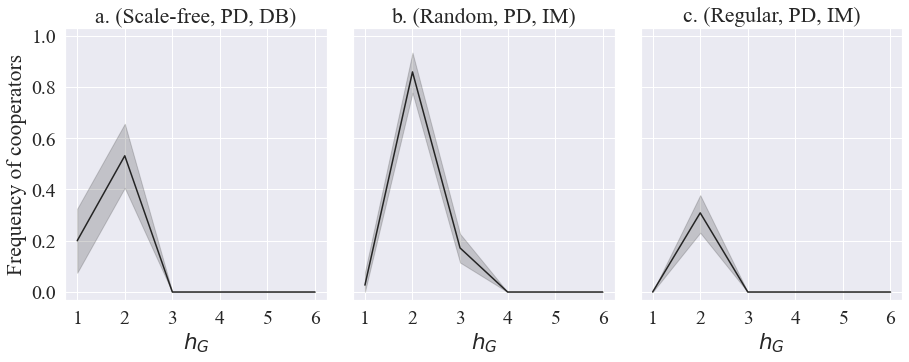

In [5]:
fig, axes = plt.subplots(ncols = 3, nrows = 1, sharey=True, figsize = (15, 5))
plt.subplots_adjust(wspace=0.1)

show_plot(df_ScaleFree_PairWise_DB, axes[0], 'a. (Scale-free, PD, DB)', '$h_G$')
show_plot(df_Random_PairWise_IM,    axes[1], 'b. (Random, PD, IM)',     '$h_G$')
show_plot(df_Regular_PairWise_IM,   axes[2], 'c. (Regular, PD, IM)',    '$h_G$')

plt.savefig("img/result2.jpg", format="jpeg", bbox_inches='tight')